# Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import streamlit as st
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset


In [2]:
wine = pd.read_csv("WineQT.csv")

# Display the first few rows of the dataset


In [3]:
print("First few rows of the dataset:")
wine.head()

First few rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Display the distribution of wine quality


In [4]:
print("\nDistribution of wine quality:")
wine["quality"].value_counts()


Distribution of wine quality:


quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

# Display the shape of the dataset


In [5]:
print("\nShape of the dataset:")
wine.shape


Shape of the dataset:


(1143, 12)

# Display information about the dataset


In [6]:
print("\nInformation about the dataset:")
wine.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


# Check for missing values in the dataset


In [7]:
print("\nMissing values in the dataset:")
wine.isnull().sum()


Missing values in the dataset:


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Display summary statistics of the dataset


In [8]:
print("\nSummary statistics of the dataset:")
wine.describe()


Summary statistics of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualize the distribution of wine quality

### Overall, this code is useful for visualizing the distribution of the quality variable in the wine_df dataframe.


<Figure size 500x500 with 0 Axes>

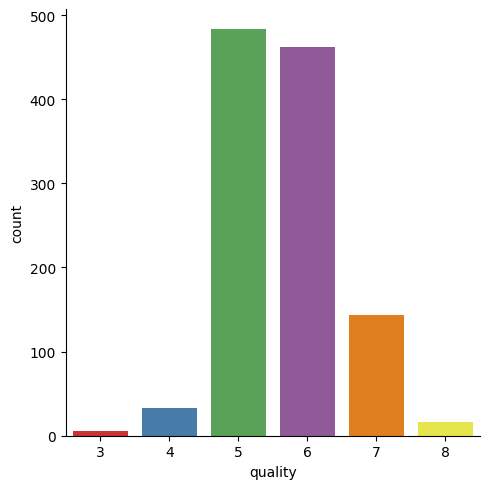

In [9]:
plt.figure(figsize=(5, 5))
sns.catplot(x="quality", data=wine, kind="count", palette="Set1")

# Visualize the relationship between wine quality and volatile acidity

#### A bar plot is a type of plot that shows the relationship between a categorical variable and a continuous variable using bars. In this case, the quality variable is a categorical variable with values ranging from 3 to 9, and the volatile acidity variable is a continuous variable representing the level of volatile acidity in each wine sample.

##### The height of each bar represents the average volatile acidity level for each quality score. This plot can help us understand the relationship between quality and volatile acidity, and how volatile acidity levels vary across different quality scores.


<Axes: xlabel='quality', ylabel='volatile acidity'>

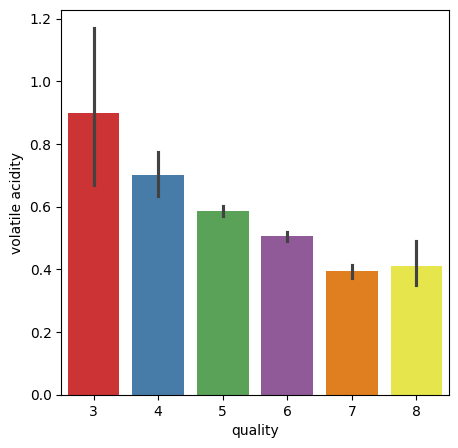

In [10]:
plt.figure(figsize=(5, 5))
sns.barplot(x="quality", y="volatile acidity", data=wine, palette="Set1")

# Visualize the relationship between wine quality and citric acid


<Axes: xlabel='quality', ylabel='citric acid'>

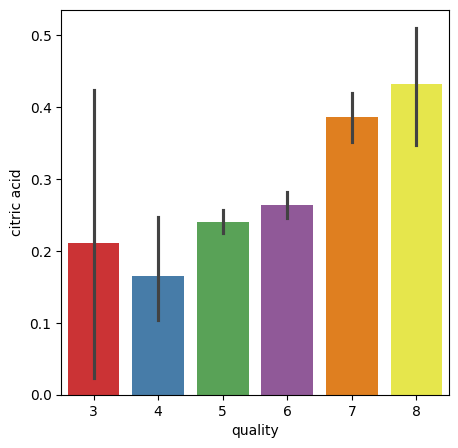

In [11]:
plt.figure(figsize=(5, 5))
sns.barplot(x="quality", y="citric acid", data=wine, palette="Set1")

# Correlation

### It is a statistical measure that describes the degree to which two variables are related to each other. It indicates the strength and direction of the relationship between the variables.

# Positive correlation

### Thisrefers to a relationship between two variables in which they both move in the same direction. That is, as one variable increases, the other variable also increases. For example, there is a positive correlation between a person's age and their income, as older people tend to have higher incomes.

# Negative correlation

### This on the other hand, refers to a relationship between two variables in which they move in opposite directions. That is, as one variable increases, the other variable decreases. For example, there is a negative correlation between the amount of exercise a person does and their weight, as people who exercise more tend to weigh less.


In [12]:
correlation = wine.corr()

# Constructing a heatmap to understand the correlation between the columns

### A heatmap is a type of plot that displays the correlation matrix between different variables using colors. The cells of the heatmap are color-coded based on the correlation coefficient values. Positive correlations are shown in shades of blue, while negative correlations are shown in shades of red.

### This code is useful for visualizing the correlations between different variables in a dataset. The heatmap() function is particularly useful for datasets with a large number of variables, as it allows for easy identification of correlations between different pairs of variables. The annot parameter adds numerical values to the heatmap cells, which can help in interpreting the correlation matrix. The square parameter ensures that the cells are square-shaped, which can make the heatmap easier to read.


<Axes: >

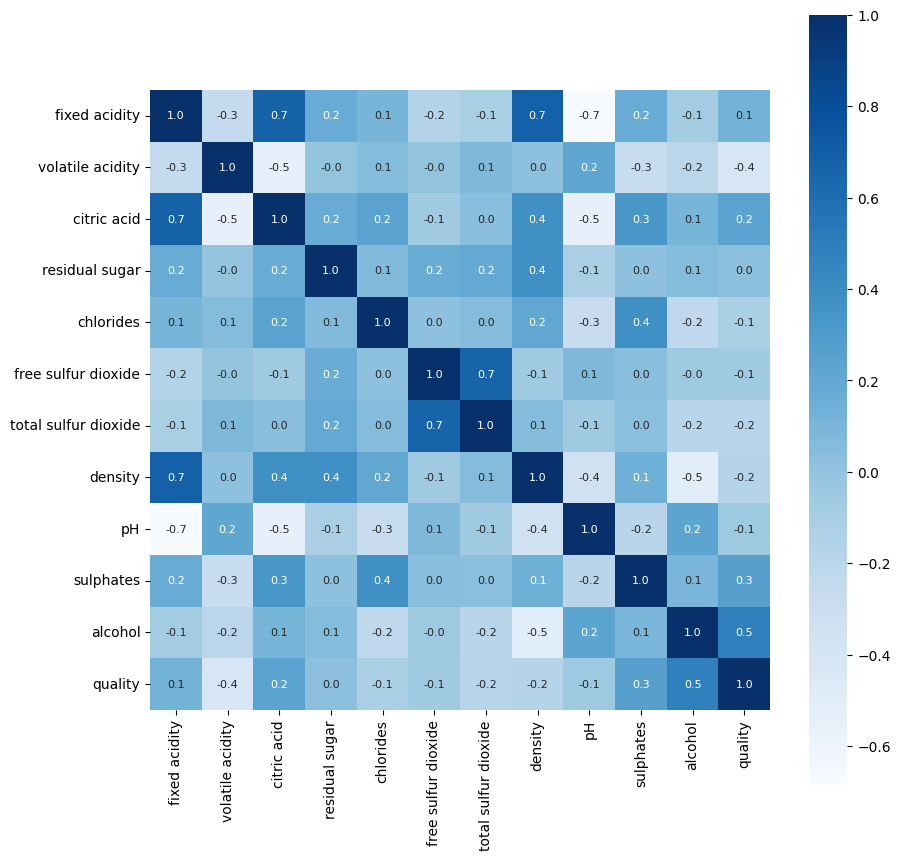

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    correlation, annot=True, square=True, fmt=".1f", annot_kws={"size": 8}, cmap="Blues"
)

# Prepare the data for modeling


In [14]:
X = wine.drop("quality", axis=1)
y = wine["quality"].apply(lambda value: 1 if value >= 7 else 0)

In [15]:
y.value_counts()

quality
0    984
1    159
Name: count, dtype: int64

# Split the data into training and testing sets


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [17]:
print(y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# Train a random forest classifier


In [18]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

# Make predictions on the test set


In [19]:
predictor = model.predict(X_test)

# Compute accuracy score


In [20]:
accuracy = accuracy_score(Y_test, predictor)
print("Accuracy:", accuracy * 100)

Accuracy: 89.08296943231441


# Classification Report


In [21]:
report = classification_report(Y_test, predictor)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       188
           1       0.86      0.46      0.60        41

    accuracy                           0.89       229
   macro avg       0.88      0.72      0.77       229
weighted avg       0.89      0.89      0.88       229



# Sample the data


In [22]:
wine.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1049,7.6,0.350,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6
1029,6.8,0.670,0.00,1.9,0.080,22.0,39.0,0.99701,3.40,0.74,9.7,5
817,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5
751,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
69,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
745,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
155,7.5,0.490,0.19,1.9,0.076,10.0,44.0,0.99570,3.39,0.54,9.7,5
94,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.2,5
285,9.0,0.430,0.34,2.5,0.080,26.0,86.0,0.99870,3.38,0.62,9.5,6
709,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4,6


# Confusion Matrix


In [23]:
cm = confusion_matrix(Y_test, predictor)
cm

array([[185,   3],
       [ 22,  19]], dtype=int64)

<Axes: >

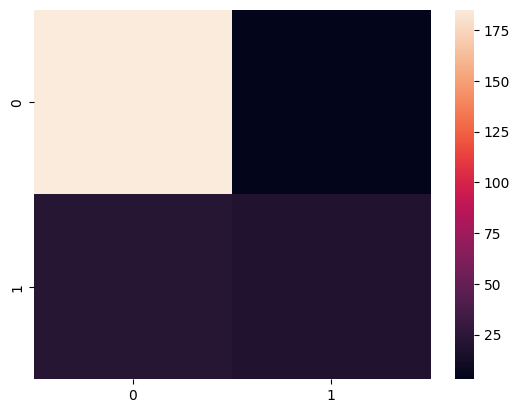

In [24]:
sns.heatmap(data=cm)

# Take custom input from the user


In [25]:
# Prepare an empty list to store user input values
input_data = []

# Ask for user input for each feature
for feature in [
    "Fixed Acidity",
    "Volatile Acidity",
    "Citric Acid",
    "Residual Sugar",
    "Chlorides",
    "Free Sulfur Dioxide",
    "Total Sulfur Dioxide",
    "Density",
    "pH",
    "Sulphates",
    "Alcohol",
]:
    value = float(input(f"Enter value for {feature}: "))
    input_data.append(value)

# Convert the list to a numpy array
np_input_data = np.asarray(input_data)

# Reshape the data for prediction
reshaped_data = np_input_data.reshape(1, -1)

# Make prediction using the model
predict = model.predict(reshaped_data)

# Display the prediction result
if predict[0] == 1:
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

' # Prepare an empty list to store user input values\ninput_data = []\n\n# Ask for user input for each feature\nfor feature in [\n    "Fixed Acidity",\n    "Volatile Acidity",\n    "Citric Acid",\n    "Residual Sugar",\n    "Chlorides",\n    "Free Sulfur Dioxide",\n    "Total Sulfur Dioxide",\n    "Density",\n    "pH",\n    "Sulphates",\n    "Alcohol",\n]:\n    value = float(input(f"Enter value for {feature}: "))\n    input_data.append(value)\n\n# Convert the list to a numpy array\nnp_input_data = np.asarray(input_data)\n\n# Reshape the data for prediction\nreshaped_data = np_input_data.reshape(1, -1)\n\n# Make prediction using the model\npredict = model.predict(reshaped_data)\n\n# Display the prediction result\nif predict[0] == 1:\n    print("Good Quality Wine")\nelse:\n    print("Bad Quality Wine") '

# Streamlit UI


In [26]:
st.set_page_config(
    page_title="Wine Quality Prediction", page_icon=":wine_glass:", layout="wide"
)

# CSS styling
css = """
<style>
    .stHeader {
        background-color: #8C1AFF;
        color: white;
        padding: 10px;
        text-align: center;
    }
    .stButton > button {
        background-color: #8C1AFF;
        color: white;
        border-radius: 20px;
        padding: 10px 20px;
    }
    .st-emotion-cache-sh2krr p {
        font-size: 22px;
    }
</style>
"""
st.markdown(css, unsafe_allow_html=True)

# Header
st.markdown(
    '<div class="stHeader"><h1>Wine Quality Prediction</h1></div>',
    unsafe_allow_html=True,
)

# Columns for input sliders
col1, col2 = st.columns(2)

with col1:
    fixed_acidity = st.slider(
        "Fixed Acidity",
        float(X["fixed acidity"].min()),
        float(X["fixed acidity"].max()),
        float(X["fixed acidity"].mean()),
        0.01,
        label_visibility="visible",
        key="fixed_acidity",
    )
    volatile_acidity = st.slider(
        "Volatile Acidity",
        float(X["volatile acidity"].min()),
        float(X["volatile acidity"].max()),
        float(X["volatile acidity"].mean()),
        0.01,
        label_visibility="visible",
        key="volatile_acidity",
    )
    citric_acid = st.slider(
        "Citric Acid",
        float(X["citric acid"].min()),
        float(X["citric acid"].max()),
        float(X["citric acid"].mean()),
        0.01,
        label_visibility="visible",
        key="citric_acid",
    )
    residual_sugar = st.slider(
        "Residual Sugar",
        float(X["residual sugar"].min()),
        float(X["residual sugar"].max()),
        float(X["residual sugar"].mean()),
        0.01,
        label_visibility="visible",
        key="residual_sugar",
    )
    chlorides = st.slider(
        "Chlorides",
        float(X["chlorides"].min()),
        float(X["chlorides"].max()),
        float(X["chlorides"].mean()),
        0.01,
        label_visibility="visible",
        key="chlorides",
    )
    free_sulfur_dioxide = st.slider(
        "Free Sulfur Dioxide",
        float(X["free sulfur dioxide"].min()),
        float(X["free sulfur dioxide"].max()),
        float(X["free sulfur dioxide"].mean()),
        0.01,
        label_visibility="visible",
        key="free_sulfur_dioxide",
    )

with col2:
    total_sulfur_dioxide = st.slider(
        "Total Sulfur Dioxide",
        float(X["total sulfur dioxide"].min()),
        float(X["total sulfur dioxide"].max()),
        float(X["total sulfur dioxide"].mean()),
        0.01,
        label_visibility="visible",
        key="total_sulfur_dioxide",
    )
    density = st.slider(
        "Density",
        float(X["density"].min()),
        float(X["density"].max()),
        float(X["density"].mean()),
        0.0001,
        label_visibility="visible",
        key="density",
    )
    pH = st.slider(
        "pH",
        float(X["pH"].min()),
        float(X["pH"].max()),
        float(X["pH"].mean()),
        0.01,
        label_visibility="visible",
        key="pH",
    )
    sulphates = st.slider(
        "Sulphates",
        float(X["sulphates"].min()),
        float(X["sulphates"].max()),
        float(X["sulphates"].mean()),
        0.01,
        label_visibility="visible",
        key="sulphates",
    )
    alcohol = st.slider(
        "Alcohol",
        float(X["alcohol"].min()),
        float(X["alcohol"].max()),
        float(X["alcohol"].mean()),
        0.01,
        label_visibility="visible",
        key="alcohol",
    )

# Predict button
predict = st.button("Predict")

# Display prediction result
if predict:
    try:
        features = np.array(
            [
                fixed_acidity,
                volatile_acidity,
                citric_acid,
                residual_sugar,
                chlorides,
                free_sulfur_dioxide,
                total_sulfur_dioxide,
                density,
                pH,
                sulphates,
                alcohol,
            ]
        ).reshape(1, -1)
        prediction = model.predict(features)

        if prediction == 1:
            st.success("The wine is good!")
        else:
            st.error("The wine is not good.")
    except ValueError:
        st.error("Please adjust the sliders to valid values.")

SyntaxError: invalid decimal literal (2906626279.py, line 11)